In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
plt.rcParams["font.size"] = 18

In [58]:
iris = datasets.load_iris()

In [59]:
X = iris.data
y = iris.target

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## scikit-learnによるLogistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)

In [22]:
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = lr.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print('accuracy: {:.4f}'.format(acc))

accuracy: 0.9778


## PytorchによるLogistic Regression

In [73]:
import torch
import torch.nn as nn

In [84]:
num_class = np.unique(y_train).shape[0]

In [85]:
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [86]:
net = nn.Linear(in_features=X_train.shape[1], out_features=num_class)
## 勾配降下法のオプティマイザーに上で定義したネットワークのパラメータを渡す
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
## MSE(mean squared error) lossクラス
loss_fn = nn.CrossEntropyLoss()

In [87]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).long()
    
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, targets)
    loss.backward()
    
    optimizer.step()
    
    return loss.item()

In [90]:
def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long() ## vectorで渡す必要がある
    
    outputs = net(inputs)
    val_loss = loss_fn(outputs, targets)
    
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    val_acc = float(correct) / targets.size(0)
    
    return val_loss.item(), val_acc

In [91]:
losses = []
val_losses = []
val_acces = []
epoch = 10000
for e in range(epoch):
    param = np.arange(X_train.shape[0])
    np.random.shuffle(param)
    X_train = X_train[param]
    y_train = y_train[param]
    
    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)
    
    if e % 100 == 0:
        print('epech {:d}, loss: {:.4f}, val_loss: {:.4f}, val_acc: {:4f}'.format(e, loss, val_loss, val_acc))
        
    losses.append(loss)
    val_losses.append(val_loss)
    val_acces.append(val_acc)

epech 0, loss: 1.4995, val_loss: 1.5135, val_acc: 0.088889
epech 100, loss: 0.7208, val_loss: 0.7576, val_acc: 0.666667
epech 200, loss: 0.5478, val_loss: 0.5927, val_acc: 0.755556
epech 300, loss: 0.4737, val_loss: 0.5248, val_acc: 0.777778
epech 400, loss: 0.4305, val_loss: 0.4864, val_acc: 0.800000
epech 500, loss: 0.4014, val_loss: 0.4608, val_acc: 0.800000
epech 600, loss: 0.3799, val_loss: 0.4421, val_acc: 0.800000
epech 700, loss: 0.3632, val_loss: 0.4274, val_acc: 0.800000
epech 800, loss: 0.3495, val_loss: 0.4151, val_acc: 0.800000
epech 900, loss: 0.3379, val_loss: 0.4045, val_acc: 0.800000
epech 1000, loss: 0.3278, val_loss: 0.3950, val_acc: 0.800000
epech 1100, loss: 0.3190, val_loss: 0.3864, val_acc: 0.800000
epech 1200, loss: 0.3109, val_loss: 0.3784, val_acc: 0.822222
epech 1300, loss: 0.3036, val_loss: 0.3709, val_acc: 0.822222
epech 1400, loss: 0.2969, val_loss: 0.3638, val_acc: 0.822222
epech 1500, loss: 0.2907, val_loss: 0.3570, val_acc: 0.822222
epech 1600, loss: 0.

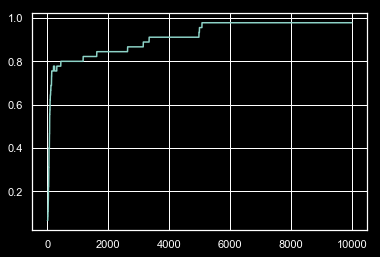

In [81]:
plt.plot(val_acces)